In [1]:
!git clone https://github.com/aleksej-lapenok/nalu

Cloning into 'nalu'...
remote: Enumerating objects: 40, done.
remote: Counting objects: 100% (40/40), done.
remote: Compressing objects: 100% (26/26), done.
remote: Total 40 (delta 15), reused 37 (delta 13), pack-reused 0
Unpacking objects: 100% (40/40), done.


In [0]:
import sys
sys.path.append('/content/nalu')

In [3]:
sys.path

['',
 '/env/python',
 '/usr/lib/python36.zip',
 '/usr/lib/python3.6',
 '/usr/lib/python3.6/lib-dynload',
 '/usr/local/lib/python3.6/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/local/lib/python3.6/dist-packages/IPython/extensions',
 '/root/.ipython',
 '/content/nalu']

In [0]:
import random
import numpy as np

import torch
import torch.nn.functional as F

import matplotlib.pyplot as plt

from models import *

In [0]:
NORMALIZE = True
NUM_LAYERS = 4
HIDDEN_DIM = 4
LEARNING_RATE = 1e-2
GAMMA = 0.6
EPOCHS = 100000
RANGE = [0, 10]
EXTRA_RANGE_MINUS = [-10, 10]
EXTRA_RANGE_PLUS = [0, 20]
USE_CUDA = True
AVERAGE_RANDOM_NETS = 1000
TRAIN_SET = 600000
TEST_SET = 5000
DIM = 100
DIM_EXTRA = 100
ARITHMETIC_FUNCTIONS = {
    'add': lambda x, y: x + y,
    'sub': lambda x, y: x - y,
    'mul': lambda x, y: x * y,
    'div': lambda x, y: x / y,
    'squared': lambda x, y: torch.pow(x, 2),
    'root': lambda x, y: torch.sqrt(x),
    'log': lambda x, y: torch.log(x)
}

In [0]:
if USE_CUDA and torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')

In [7]:
device

device(type='cuda')

In [0]:
def generate_data(num_train, num_test, dim, num_sum, fn, support, device):
    data = torch.zeros([dim, 1], dtype=torch.float).uniform_(*support)
    X, y = [], []
    for i in range(num_train + num_test):
        idx_a = random.sample(range(dim), num_sum)
        idx_b = random.sample([x for x in range(dim) if x not in idx_a], num_sum)
        a, b = data[idx_a].sum(), data[idx_b].sum()
        X.append([a, b])
        y.append(fn(a, b))
    X = torch.tensor(data=X, dtype=torch.float, device=device)
    y = torch.tensor(data=y, dtype=torch.float, device=device).unsqueeze_(1)
    indices = list(range(num_train + num_test))
    np.random.shuffle(indices)
    X_train, y_train = X[indices[num_test:]], y[indices[num_test:]]
    X_test, y_test = X[indices[:num_test]], y[indices[:num_test]]
    return X_train, y_train, X_test, y_test

In [0]:
def train(model, optimizer, data_train, target_train, num_iters, regenerate_data_freq = 0, scheduler = None):
    losses = []
    means = []
    if regenerate_data_freq > 0:
      count_split = int(len(data_train) / (num_iters / regenerate_data_freq))
      end_index = 0
    else:
      data = data_train
      target = target_train
    for i in range(0, num_iters):
        if scheduler is not None:
            scheduler.step()
        if regenerate_data_freq > 0 and i % regenerate_data_freq == 0:
            start_index = end_index
            end_index = start_index + count_split
            data = data_train[start_index:end_index]
            target = target_train[start_index:end_index]
        out = model(data)
        loss = F.mse_loss(out, target)
        mea = torch.mean(torch.abs(target - out))
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        loss_val = loss.item()
        mean_diff = mea.item()
        losses.append(loss_val)
        means.append(mea.item())
        print(f'\r epoch: [{i+1}/{num_iters}], loss: {loss_val}, mean_diff: {mean_diff}', end='')
    return losses, means

def test(model, data, target):
    with torch.no_grad():
        out = model(data)
        return torch.abs(target - out)

[*] Testing function: add
	Training NALU...
 with data refresh
 epoch: [23/100000], loss: 2157.82958984375, mean_diff: 45.77803421020508

/usr/local/lib/python3.6/dist-packages/torch/optim/lr_scheduler.py:123: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  "https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate", UserWarning)


 epoch: [100000/100000], loss: 0.0005471365875564516, mean_diff: 0.012154466472566128
		Test finished 0.012380387634038925
		Test finished (extra plus) 0.45583099126815796
		Test finished (extra minus) 0.33830755949020386


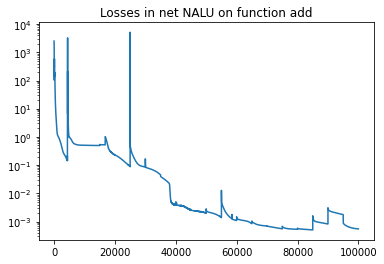

[*] Testing function: sub
	Training NALU...
 with data refresh
 epoch: [23/100000], loss: 75.94070434570312, mean_diff: 6.956230640411377

/usr/local/lib/python3.6/dist-packages/torch/optim/lr_scheduler.py:123: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  "https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate", UserWarning)


 epoch: [100000/100000], loss: 0.000914313190151006, mean_diff: 0.019237102940678596
		Test finished 0.01887107454240322
		Test finished (extra plus) 0.7955975532531738
		Test finished (extra minus) 0.7563846707344055


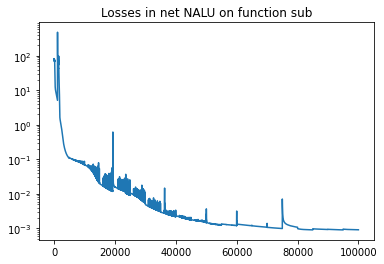

[*] Testing function: mul
	Training NALU...
 with data refresh
 epoch: [23/100000], loss: 414316.65625, mean_diff: 608.4993286132812

/usr/local/lib/python3.6/dist-packages/torch/optim/lr_scheduler.py:123: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  "https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate", UserWarning)


 epoch: [100000/100000], loss: 0.06325104087591171, mean_diff: 0.11055393517017365
		Test finished 0.11243163794279099
		Test finished (extra plus) 94.41053009033203
		Test finished (extra minus) 50.86689376831055


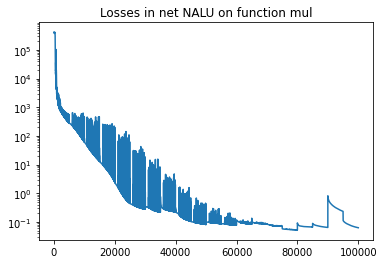

[*] Testing function: div
	Training NALU...
 with data refresh
 epoch: [23/100000], loss: 0.2966970205307007, mean_diff: 0.35679125785827637

/usr/local/lib/python3.6/dist-packages/torch/optim/lr_scheduler.py:123: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  "https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate", UserWarning)


 epoch: [100000/100000], loss: 6.103236592025496e-05, mean_diff: 0.004252139944583178
		Test finished 0.004073462449014187
		Test finished (extra plus) 0.05813464894890785
		Test finished (extra minus) 0.04605709761381149


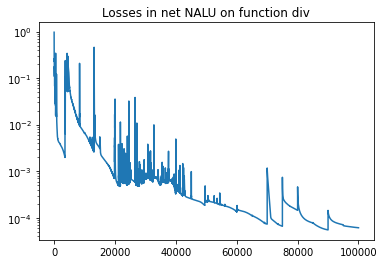

[*] Testing function: squared
	Training NALU...
 with data refresh
 epoch: [22/100000], loss: 549014.375, mean_diff: 662.456787109375

/usr/local/lib/python3.6/dist-packages/torch/optim/lr_scheduler.py:123: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  "https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate", UserWarning)


 epoch: [100000/100000], loss: 88.35163116455078, mean_diff: 4.186293601989746
		Test finished 4.361006736755371
		Test finished (extra plus) 136.35702514648438
		Test finished (extra minus) 148.81735229492188


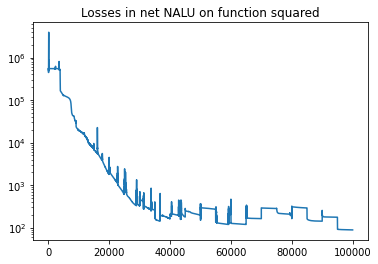

[*] Testing function: root
	Training NALU...
 with data refresh
 epoch: [23/100000], loss: 9.280115127563477, mean_diff: 2.702022075653076

/usr/local/lib/python3.6/dist-packages/torch/optim/lr_scheduler.py:123: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  "https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate", UserWarning)


 epoch: [100000/100000], loss: 1.1683478078339249e-06, mean_diff: 0.000619121768977493
		Test finished 0.0006206255056895316
		Test finished (extra plus) 0.06103631481528282
		Test finished (extra minus) 0.07461126148700714


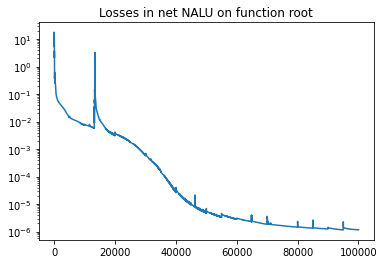

[*] Testing function: log
	Training NALU...
 with data refresh
 epoch: [23/100000], loss: 2.407184600830078, mean_diff: 1.5179880857467651

/usr/local/lib/python3.6/dist-packages/torch/optim/lr_scheduler.py:123: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  "https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate", UserWarning)


 epoch: [100000/100000], loss: 2.743441029906535e-07, mean_diff: 0.0003116144216619432
		Test finished 0.00030970474472269416
		Test finished (extra plus) 0.022869886830449104
		Test finished (extra minus) 0.029306326061487198


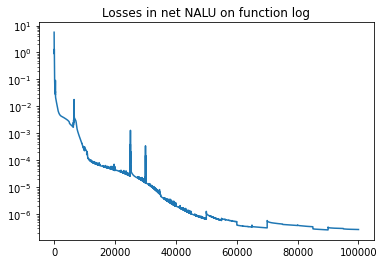

In [13]:
results = {}
for fn_str, fn in ARITHMETIC_FUNCTIONS.items():
    print('[*] Testing function: {}'.format(fn_str))
    results[fn_str] = []

    # dataset
    X_train, y_train, X_test, y_test = generate_data(
        num_train=TRAIN_SET, num_test=TEST_SET,
        dim=DIM, num_sum=5, fn=fn,
        support=RANGE, device=device
    )
    
    _, _, extra_plus_x, extra_plus_y = generate_data(
            num_train=0, num_test=TEST_SET,
            dim=DIM_EXTRA, num_sum=5, fn=fn,
            support=EXTRA_RANGE_PLUS,
            device=device
        )
    _, _, extra_minus_x, extra_minus_y = generate_data(
        num_train=0, num_test=TEST_SET,
        dim=DIM_EXTRA, num_sum=5, fn=fn,
        support=EXTRA_RANGE_PLUS,
        device=device
    )

    # random model
    random_mse = []
    for i in range(AVERAGE_RANDOM_NETS):
        net = MLP(
            num_layers=NUM_LAYERS, in_dim=2,
            hidden_dim=HIDDEN_DIM, out_dim=1,
            activation='relu6', device=device
        )
        mse = test(net, X_test, y_test)
        random_mse.append(mse.mean().item())
    results[fn_str].append(np.mean(random_mse))

    models = [
        # (NALU(
        #     num_layers=NUM_LAYERS,
        #     in_dim=2,
        #     hidden_dim=HIDDEN_DIM,
        #     out_dim=1,
        #     device=device
        # ), 0),
        (NALU(
            num_layers=NUM_LAYERS,
            in_dim=2,
            hidden_dim=HIDDEN_DIM,
            out_dim=1,
            device=device
        ), 5000),
    ]

    # others
    for net, freq in models:
        print("\tTraining {}...".format(net.__str__().split("(")[0]))
        if freq > 0:
            print(" with data refresh")
        optim = torch.optim.Adam(net.parameters(), lr=LEARNING_RATE)
        if freq > 0:
            scheduler = torch.optim.lr_scheduler.StepLR(optim, step_size=freq, gamma=GAMMA)
        else:
            scheduler = None
        losses, means = train(net, optim, X_train, y_train, EPOCHS, freq, scheduler)
        mse = test(net, X_test, y_test).mean().item()
        print("\n\t\tTest finished {}".format(mse))
        
        mse_plus = test(net, extra_plus_x, extra_plus_y).mean().item()
        print(f"\t\tTest finished (extra plus) {mse_plus}")
        
        mse_minus = test(net, extra_minus_x, extra_minus_y).mean().item()
        print(f"\t\tTest finished (extra minus) {mse_minus}")
        results[fn_str].append(((mse, mse_plus, mse_minus), losses, means))
        epochs = np.arange(EPOCHS)
        plt.figure()
        plt.plot(epochs, losses)
        plt.yscale('log')
        plt.title('Losses in net {} on function {}'.format(net.__str__().split("(")[0], fn_str))
        plt.show()

In [14]:
print("Operation\tNALU")
for k, v in results.items():
    print("{}\t".format(k), end='')
    rand = results[k]
    for ms in results[k][1:]:
        print(f"{ms[0]}\t", end='')
    print()

for k, v in results.items():
    print("{}\t".format(k), end='')
    rand = results[k][0]
    mses = [[100.0 * xx / rand for xx in x[0]] for x in results[k][1:]]
    for ms in mses:
        print(f"{ms}\t", end='')
    print()

Operation	NALU
add	(0.012380387634038925, 0.45583099126815796, 0.33830755949020386)	
sub	(0.01887107454240322, 0.7955975532531738, 0.7563846707344055)	
mul	(0.11243163794279099, 94.41053009033203, 50.86689376831055)	
div	(0.004073462449014187, 0.05813464894890785, 0.04605709761381149)	
squared	(4.361006736755371, 136.35702514648438, 148.81735229492188)	
root	(0.0006206255056895316, 0.06103631481528282, 0.07461126148700714)	
log	(0.00030970474472269416, 0.022869886830449104, 0.029306326061487198)	
add	[0.02437664706968172, 0.897518843999398, 0.6661183981044421]	
sub	[0.26138438643176665, 11.019869474651149, 10.47672948469677]	
mul	[0.018487730593630024, 15.524424240799519, 8.364313153579044]	
div	[0.36818883757329124, 5.254627749031987, 4.162971782526871]	
squared	[0.6601583220245063, 20.64138634739422, 22.527599590969476]	
root	[0.012309573500062993, 1.2106028458449494, 1.4798502459004328]	
log	[0.00965883839195861, 0.7132488110102365, 0.9139836315501163]	


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if sys.path[0] == '':


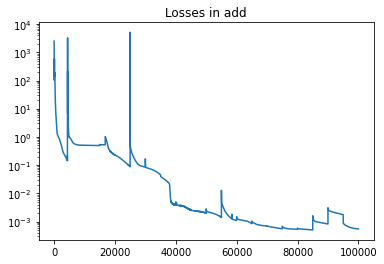

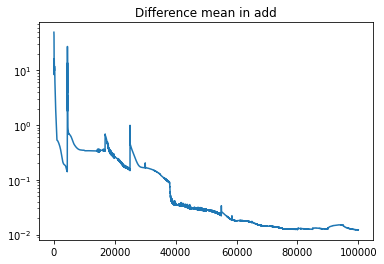

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if sys.path[0] == '':


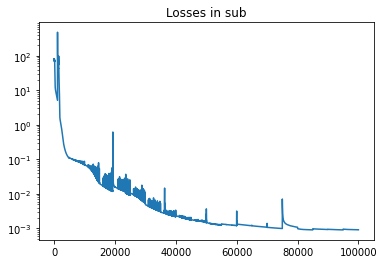

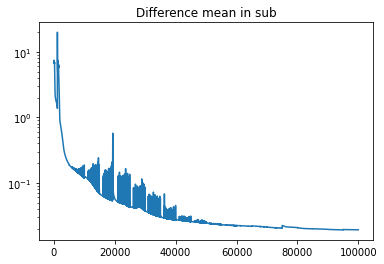

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if sys.path[0] == '':


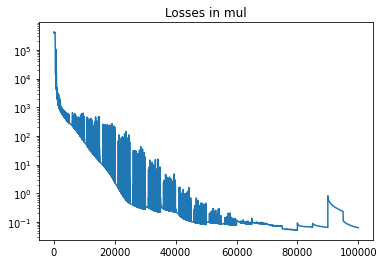

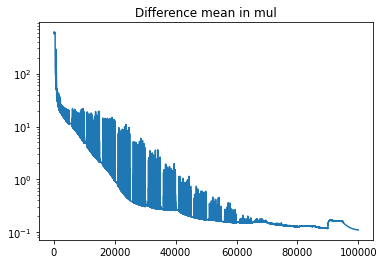

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if sys.path[0] == '':


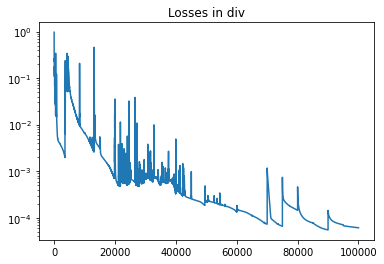

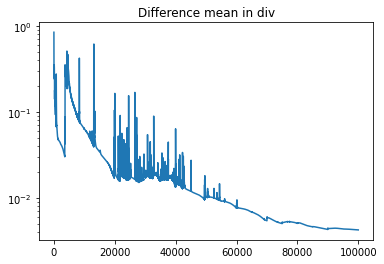

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if sys.path[0] == '':


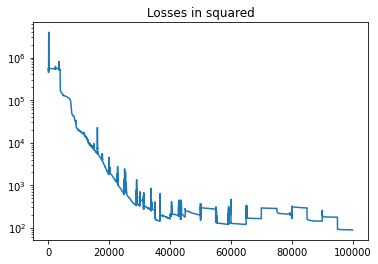

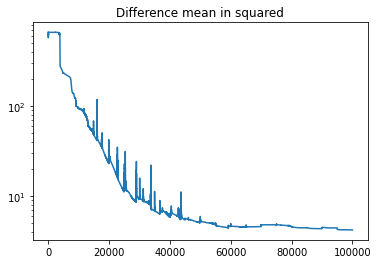

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if sys.path[0] == '':


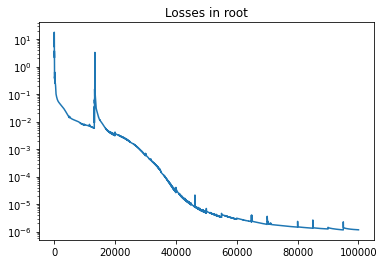

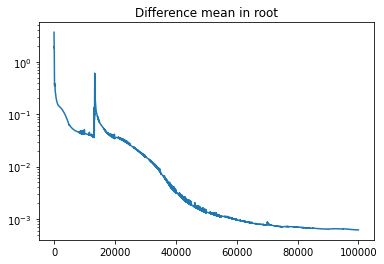

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if sys.path[0] == '':


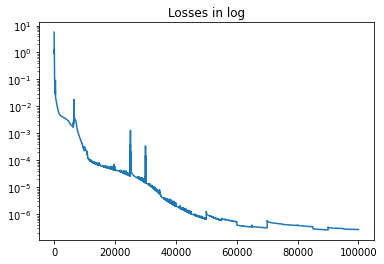

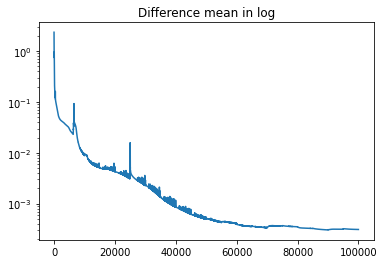

In [15]:
for k, av in results.items():
    epochs = np.arange(EPOCHS)
    v, losses, means = av[1]
    plt.figure()
    plt.plot(epochs, losses)
    plt.yscale('log')
    plt.title('Losses in {}'.format(k))
    plt.figure()
    plt.plot(epochs, means)
    plt.yscale('log')
    plt.title('Difference mean in {}'.format(k))
    plt.subplot()
    plt.show()